In [3]:
import pandas as pd

# Load the CSV file
english_stories = pd.read_csv('duchas_stories.csv')

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15105006\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15105006\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\15105006\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\15105006\AppData\Roaming\nltk_data...


True

In [6]:
# Load the CSV file
english_stories = pd.read_csv('duchas_stories.csv')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove special characters and digits
    text = ''.join([i for i in text if not i.isdigit()])
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back to a single string
    return ' '.join(words)

# Apply preprocessing
english_stories['Transcription'] = english_stories['Transcription'].apply(preprocess_text)


count    3370.000000
mean       -0.372966
std         0.597852
min        -0.992800
25%        -0.883400
50%        -0.612400
75%         0.025800
max         0.994700
Name: Sentiment, dtype: float64


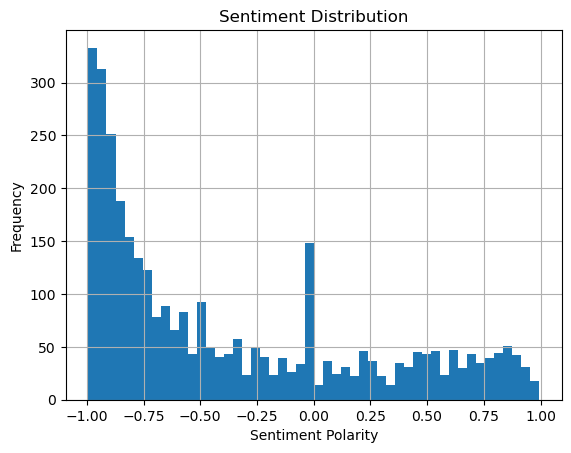

In [7]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_vader_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis
english_stories['Sentiment'] = english_stories['Transcription'].apply(get_vader_sentiment)

# Analyze and visualize results
print(english_stories['Sentiment'].describe())

import matplotlib.pyplot as plt

# Plot sentiment distribution
english_stories['Sentiment'].hist(bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Save the results
english_stories.to_csv('english_stories_with_vader_sentiment.csv', index=False)
